<a href="https://colab.research.google.com/github/AecioLima/Scripts/blob/master/Petr4_com_RNN_em_Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
base = pd.read_csv('/content/petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [ ]:
previsores = []
preco_real = []

In [ ]:
#for vai percorrer a base e vai preenchendo as listas criadas, precisa mudar esse FOR para algo mais rápido
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [ ]:
#criação do regressor 

regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

In [ ]:
#métrica e analise com 100 epocas (fazer comparativo com a ideia de Maurício)

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
1152/1152 [==============================] - 10s 9ms/step - loss: 0.0014 - mean_absolute_error: 0.0280
Epoch 2/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0280
Epoch 3/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0281
Epoch 4/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0270
Epoch 5/100
1152/1152 [==============================] - 9s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0274
Epoch 6/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0265
Epoch 7/100
1152/1152 [==============================] - 9s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0271
Epoch 8/100
1152/1152 [==============================] - 9s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0263
Epoch 9/100
1152/1152 [==============================] - 9s 7ms/step - loss: 0.0014 - m

In [ ]:
base_teste = pd.read_csv('/content/petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [ ]:
#Lista para ser preenchida com o percorrimento do FOR (Vetorizar após os testes)
X_teste = []

In [ ]:
#FOR para fazer o append 
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

In [ ]:
previsoes.mean()

17.6095

In [ ]:
preco_real_teste.mean()

17.87454563636364

In [ ]:
17.6095 - 17.874545

-0.26504500000000064

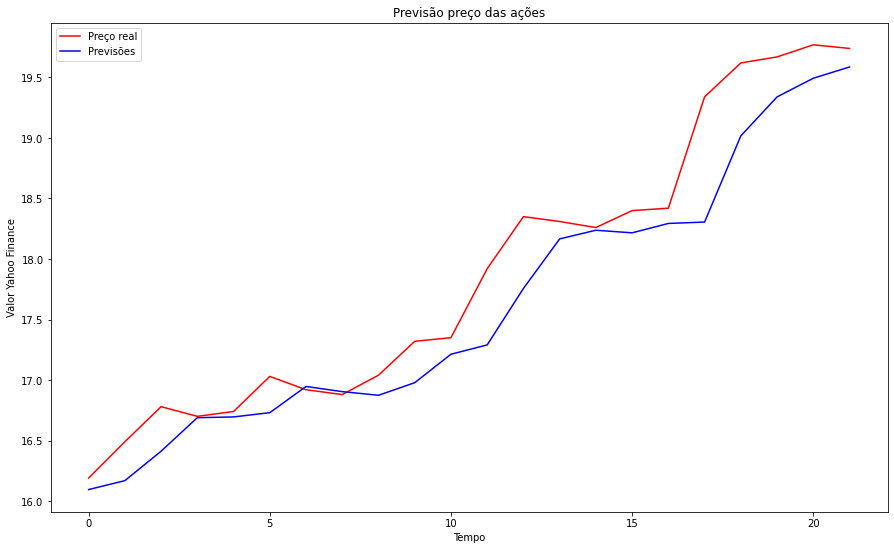

In [ ]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo Finance')
plt.rcParams['figure.figsize'] = (15,9)
plt.legend()
plt.show()

Diferença entre preço real e preço previsto tem uma média de diferença de 0,35 centavos usando como Backend o TensorFlow. 

Em outra configuração usando o Theano como backend o valor da diferença caiu para R$0,09 e mostra que podemos ter algo muito bom. 

Agora pode ser vetorizado algumas partes para eliminar o FOR e ajustar melhor as configurações do TensorFlow. 